In [1]:
import matplotlib.pyplot as plt
import montecarlo_module
from montecarlo_module import *
import numpy as np
import pandas as pd

In [2]:
if __name__ == '__main__':
    hotelroom = HotelRoom.attribute_collector()
    hotel_capacity = hotelroom.hotel_capacity
    day_type = hotelroom.holiday_boolean

    if hotelroom.hotel_category == 'Business' or hotelroom.hotel_category == 'business':
        if 0 < hotelroom.day_of_booking < 7 and day_type == False:
            print(
                'Hold on while we run simulations to find the most optimal overbooking number for your hotel on the '
                'given date!')
            result_of_montecarlo = Monte_Carlo(hotel_capacity, hotelroom.holiday_boolean, hotelroom.standard_cost,
                                               hotelroom.deluxe_cost, hotelroom.superior_cost,
                                               hotelroom.standard_capacity, hotelroom.deluxe_capacity,
                                               hotelroom.superior_capacity, hotelroom.superior_split_percentage,
                                               hotelroom.deluxe_split_percentage, hotelroom.standard_split_percentage)
        else:
            print(
                "The date you're trying to make the reservation for is a holiday or a weekend.You're hotel runs "
                "typically empty during vacations/holidays and weekdays. Hence overbooking any rooms on this given "
                "date is not advised.")
    else:
        if day_type or hotelroom.day_of_booking == 0 or hotelroom.day_of_booking == 7:
            print(
                'Hold on while we run simulations to find the most optimal overbooking number for your hotel on the '
                'given date!')
            result_of_montecarlo = Monte_Carlo(hotel_capacity, hotelroom.holiday_boolean, hotelroom.standard_cost,
                                               hotelroom.deluxe_cost, hotelroom.superior_cost,
                                               hotelroom.standard_capacity, hotelroom.deluxe_capacity,
                                               hotelroom.superior_capacity, hotelroom.superior_split_percentage,
                                               hotelroom.deluxe_split_percentage, hotelroom.standard_split_percentage)
        else:
            print(
                "The date you're trying to make the reservation for is a weekday. You're hotel runs typically empty "
                "during vacations/holidays and weekdays. Hence overbooking any rooms on this given date is not "
                "adviced. ")

    

Enter the date you want to book (MM-DD-YYYY):01-17-2019
You will now be required to create your own hotel, please give required input as per the prompt. According to this program, you can create a hotel with 3 types of rooms (Standard|Deluxe|Superior). The system will ask you for the split of each category and room and their corresponding costs.
Enter the total number of rooms:100
Enter the superior room split:20
Enter the deluxe room split:30
Enter the standard room split:50
Enter the price of Superior room:500
Enter the price of deluxe room:300
Enter the standard room price:100
What is your hotel's type? Business/Vacationbusiness
Hold on while we run simulations to find the most optimal overbooking number for your hotel on the given date!
done


In [3]:
frame = pd.DataFrame(data=result_of_montecarlo['mean_revenues'],
                         columns=['Overbooking Number', 'Overbooked Standard Rooms', 'Overbooked Deluxe Rooms',
                                  'Overbooked Superior Rooms', 'Standard Revenue', 'Deluxe Revenue', 'Superior Revenue',
                                  'Estimated Total Revenue'])
frame1 = pd.DataFrame(data=result_of_montecarlo['cancel'],
                          columns=['Max Cancellation Number', 'Cancelled Standard Rooms', 'Cancelled Deluxe Rooms',
                                   'Cancelled Superior Rooms', 'Final Refund', 'Percentage Change'])
frame2 = pd.DataFrame(data=result_of_montecarlo['dict'],
                          columns=['Overbook', 'Cancel', 'Rev'])
    

Text(0.5, 1.0, 'Revenue v.s. Overbooking Number')

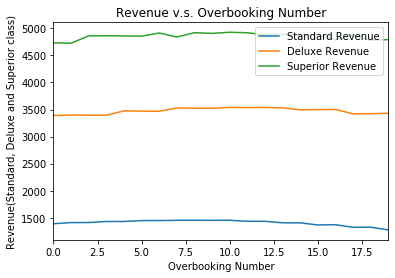

In [4]:
frame[['Standard Revenue', 'Deluxe Revenue', 'Superior Revenue']].plot()
plt.xlabel('Overbooking Number')
plt.ylabel('Revenue(Standard, Deluxe and Superior class)')
plt.title('Revenue v.s. Overbooking Number')

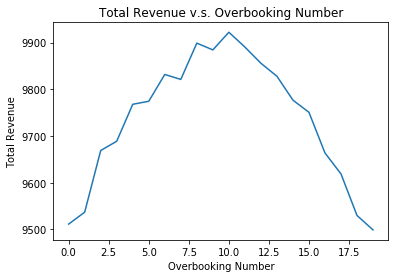

In [5]:
plt.plot(frame['Estimated Total Revenue'])
plt.xlabel('Overbooking Number')
plt.ylabel('Total Revenue')
plt.title('Total Revenue v.s. Overbooking Number')
plot_all = plt.gcf()

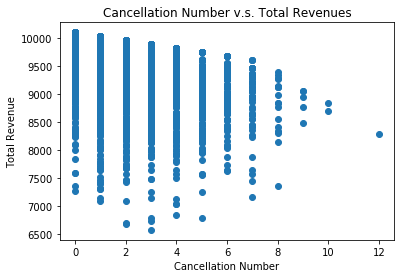

In [6]:
plt.scatter(frame2['Cancel'][0], frame2['Rev'][0])
plt.xlabel('Cancellation Number')
plt.ylabel('Total Revenue')
plt.title('Cancellation Number v.s. Total Revenues')
plt.show()

In [7]:
frame = frame.assign(**{'Overbooking Percentage': lambda x: x['Overbooking Number'] / hotel_capacity * 100})
frame = frame.assign(**{'Overbooking Percentage': lambda x: x['Overbooking Percentage'].map('{:.2f}%'.format)})
max_rev = frame.loc[frame['Estimated Total Revenue'].idxmax()]
print(max_rev)
max_rev = frame1.loc[frame1['Percentage Change'].idxmax()]
print('Maximum cancellation number associated with overbookings is:',max_rev .iloc[0])
    

Overbooking Number                10
Overbooked Standard Rooms          5
Overbooked Deluxe Rooms            3
Overbooked Superior Rooms          2
Standard Revenue             1453.42
Deluxe Revenue                3539.8
Superior Revenue             4928.93
Estimated Total Revenue      9922.15
Overbooking Percentage        10.00%
Name: 10, dtype: object
Maximum cancellation number associated with overbookings is: 8.0
